In [1]:
using Distributions
using Random
using LinearAlgebra
using Plots
using StatsBase
using LaTeXStrings
gr()

Plots.GRBackend()

In [2]:
function make_data()
    """
    データの作成関数
    z = 2x + 5y + 1 に N(0,1)のノイズを追加してデータ作成
    """

    number_of_data = 50
    x = collect(range(-5, 5, length=number_of_data))
    y = collect(range(-3, 7, length=number_of_data))
    z = 2 * x + 5 * y .+ 1 + rand(Normal(0,1),number_of_data)

    return x, y, z
end

make_data (generic function with 1 method)

In [3]:
function make_design_matrix(x,y)
    """
    計画行列作成関数

    Parameters
    ----------
    x : list of float
        1次元データ
    y : list of float
        1次元データ
    
    
    Returns
    -------
    design_mat : matrix of float
        計画行列
    """

    design_mat = hcat(ones(length(x)), x, y)

    return design_mat
end

make_design_matrix (generic function with 1 method)

In [4]:
function multiple_regression(design_mat, z)
    """
    パラメータ推定関数

    Parameters
    ----------
    design_mat : matrix of float
        計画行列
    z : list of float
        1次元データ
    
    Returns
    -------
    w : list of float
        重回帰モデルの解
    """

    w = (design_mat' * design_mat) \ design_mat' * z

    return w
end

multiple_regression (generic function with 1 method)

In [5]:
function estimate_func(design_mat, w)
    """
    推定値出力関数

    Parameters
    ----------
    design_mat : matrix of float
        計画行列
    w : list of float
        重回帰モデルの解

    Returns
    -------
    z_hat : list of float
        推定値
    """

    z_hat = design_mat * w

    return z_hat
end

estimate_func (generic function with 1 method)

In [6]:
function main()

    x, y, z = make_data()
    design_mat = make_design_matrix(x,y)
    w = multiple_regression(design_mat, z)
    z_hat = estimate_func(design_mat, w)

    #パラメータ推定値(1,2,5が正解)
    print("パラメータ推定値((1,2,5)を元にデータ生成):",w)
    
    #可視化
    plot(x,y,z,label="data")
    plot!(x,y,z_hat,label="estimate")
    plot!(xlabel=L"x",ylabel=L"y",zlabel=L"z",legend=:topleft)
end

main (generic function with 1 method)

パラメータ推定値((1,2,5)を元にデータ生成):[1.8989442968105288, 2.344557455750352, 4.642157304962534]

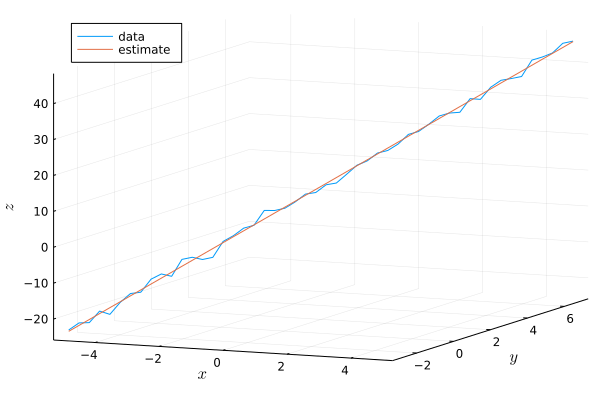

In [7]:
main()